In [9]:
import pandas as pd

df_tran = pd.read_csv('datasets/transactions.csv')
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [10]:
df_tran.shape

(500000, 7)

In [15]:
df_tran[df_tran.platform.isnull()].shape

(4941, 7)

In [47]:
df_tran.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [21]:
pd.crosstab(df_tran['platform'], df_tran['product_category'])

product_category,Beauty & Personal Care,Books,Electronics,Fashion & Apparel,Garden & Outdoor,Home Decor,Kitchen Appliances,Sports,Toys & Games
platform,,,,,,,,,
Alibaba,8475,2041,19207,17173,3511,5796,8603,7346,1432
Amazon,16581,4054,43486,34752,7012,11092,16749,14761,2956
Cred,2784,648,6511,5808,1189,1920,2913,2508,460
Ebay,1152,268,2580,2375,475,751,1150,999,194
Flipkart,14013,3300,31982,29140,5900,9500,14191,12234,2400
Meesho,8013,2048,19243,17232,3506,5750,8534,7424,1521
Shopify,4475,1155,10229,9253,1809,3141,4649,3948,757


In [43]:
# Group by 'product_category' and find the mode (most frequent) platform
df_tran.groupby('product_category')['platform'].apply(lambda x: x.mode().iloc[0]).reset_index()

,product_category,platform
0,Beauty & Personal Care,Amazon
1,Books,Amazon
2,Electronics,Amazon
3,Fashion & Apparel,Amazon
4,Garden & Outdoor,Amazon
5,Home Decor,Amazon
6,Kitchen Appliances,Amazon
7,Sports,Amazon
8,Toys & Games,Amazon


In [ ]:
# so as we can see most used platform for all categories is Amoazon so we replace those Nan vlaues to Amazon

In [44]:
# Filling NaN values in the 'platform' column with the most common 'platform' within each 'product_category'

df_tran.groupby('product_category')['platform'].transform(lambda x: x.fillna(x.mode()[0]))

0         Flipkart
1          Alibaba
2          Shopify
3          Shopify
4           Amazon
            ...   
499995      Amazon
499996      Meesho
499997      Amazon
499998    Flipkart
499999      Amazon
Name: platform, Length: 500000, dtype: object

In [45]:
df_tran[df_tran['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [31]:
df_tran[df_tran['tran_id'] == 356]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,Amazon,Electronics,Net Banking


## Finding outlier for transactions data-frame

In [48]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [49]:
# by confirming with the business manager that 0 amount is invlaid

In [50]:
df_tran[df_tran['tran_amount'] == 0].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [54]:
df_tran_zero = df_tran[df_tran['tran_amount'] == 0]
df_tran_zero.value_counts()

tran_id  cust_id  tran_date   tran_amount  platform  product_category  payment_type
121      440      2023-01-01  0            Amazon    Electronics       Credit Card     1
332551   164      2023-06-15  0            Amazon    Electronics       Credit Card     1
334046   573      2023-06-15  0            Amazon    Electronics       Credit Card     1
333876   841      2023-06-15  0            Amazon    Electronics       Credit Card     1
333733   122      2023-06-15  0            Amazon    Electronics       Credit Card     1
                                                                                      ..
160873   802      2023-03-21  0            Amazon    Electronics       Credit Card     1
160812   430      2023-03-21  0            Amazon    Electronics       Credit Card     1
160457   834      2023-03-21  0            Amazon    Electronics       Credit Card     1
160368   185      2023-03-21  0            Amazon    Electronics       Credit Card     1
499973   224      2023-09-

In [53]:
# 4734 rows have the 0 amount

In [55]:
df_tran_zero[["platform", "product_category", "payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [ ]:
# means all the 0 transaction are donw form same platform[Amazon], same type of product_category and same payment method [Credit card]

In [58]:
df_tran_outlier = df_tran[(df_tran["platform"] == "Amazon") & (df_tran["product_category"] == "Electronics") & (df_tran["payment_type"] == "Credit Card")]
df_tran_outlier

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [64]:
df_tran_outlier.shape

(15637, 7)

In [65]:
df_tran_outlier[df_tran_outlier.tran_amount > 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [66]:
median_to_replace = df_tran_outlier[df_tran_outlier.tran_amount > 0].tran_amount.median()
median_to_replace

554.0

In [68]:
df_tran['tran_amount'].replace(0, median_to_replace, inplace=True)

In [70]:
df_tran[df_tran['tran_amount'] == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [71]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

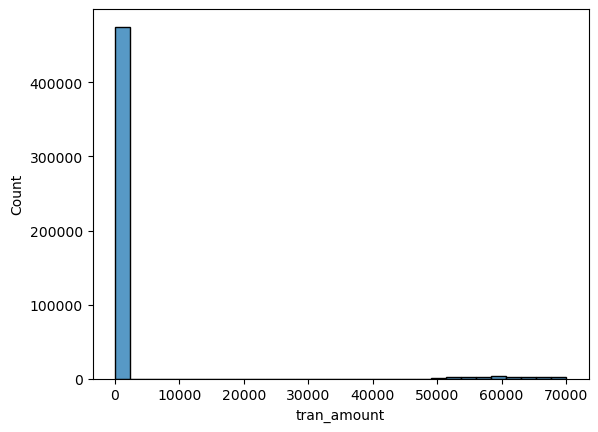

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tran.tran_amount, bins=30)

In [ ]:
# so we clearly can see there are some outlier and its looking right-skewd graph 

<Axes: xlabel='tran_amount', ylabel='Count'>

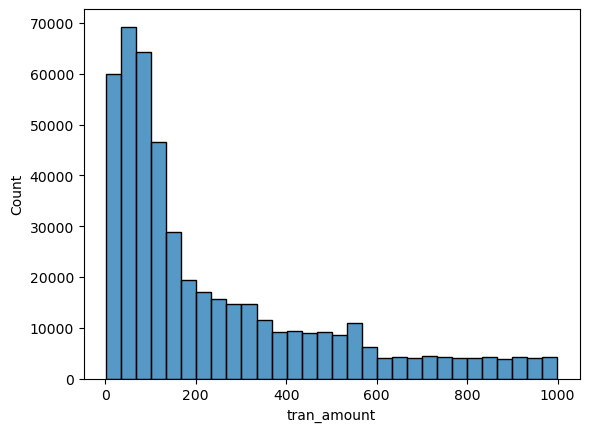

In [77]:
sns.histplot(df_tran[df_tran.tran_amount < 10000].tran_amount, bins=30)

In [ ]:
# so the graph is clearly right skewed means for removing the outlier in trans_amount we will use [IQR = Inner Quarentile Range]

In [80]:
Q1, Q3 = df_tran['tran_amount'].quantile([0.25, 0.75])

IQR = Q3 - Q1

lower = Q1 - 2*IQR  # althrough we use 1.5* but it becomes very strict so here we are using 2*
upper = Q3 + 2*IQR

lower, upper

(-628.0, 1107.0)

In [82]:
df_tran_outlier_2 = df_tran[df_tran.tran_amount >= upper]
df_tran_outlier_2.shape

(25000, 7)

In [83]:
df_tran_outlier_2.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [85]:
df_tran_new = df_tran[df_tran.tran_amount < upper]
df_tran_new.shape

(475000, 7)

In [86]:
df_tran_new.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [97]:
tran_product_category_wise_mean = df_tran_new.groupby("product_category")["tran_amount"].mean()
tran_product_category_wise_mean 

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [98]:
df_tran.loc[df_tran_outlier_2.index, 'tran_amount']

26         92.167205
49         50.333298
94        176.773288
104        64.553463
113       176.773288
             ...    
499742     64.553463
499888     64.553463
499900    269.181631
499966    269.181631
499996     64.553463
Name: tran_amount, Length: 25000, dtype: float64

In [99]:
df_tran.loc[df_tran_outlier_2.index, 'tran_amount'] = df_tran_outlier_2['product_category'].map(tran_product_category_wise_mean)

In [100]:
df_tran.loc[df_tran_outlier_2.index] 

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

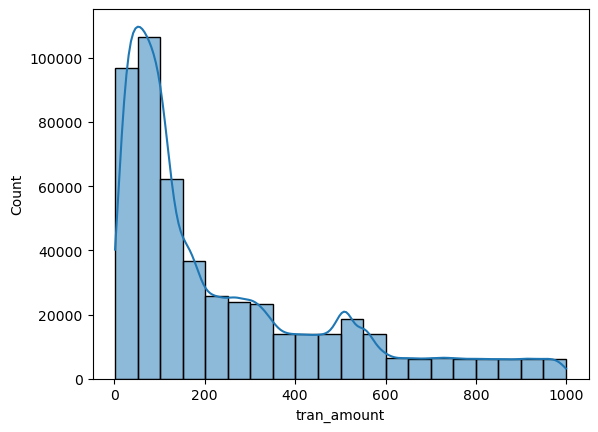

In [102]:
sns.histplot(df_tran.tran_amount, kde=True, bins=20)

## Distribution of payment_type Methods:

In [104]:
df_tran.payment_type.value_counts()

payment_type
Phonepe        144228
Credit Card    139778
Gpay           109218
Debit Card      59500
Net Banking     43223
Cash             4053
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='payment_type'>

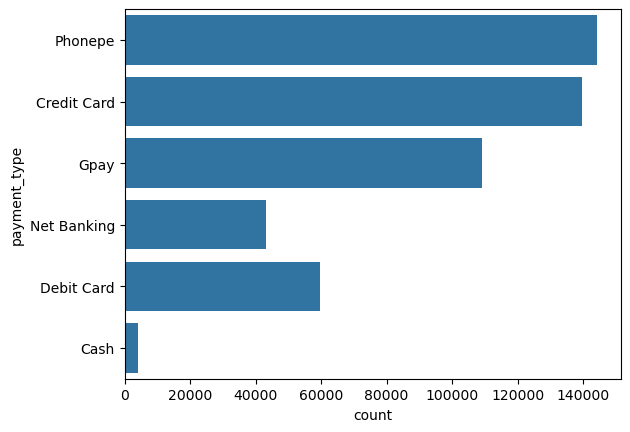

In [105]:
sns.countplot(df_tran.payment_type)

<Axes: xlabel='payment_type', ylabel='count'>

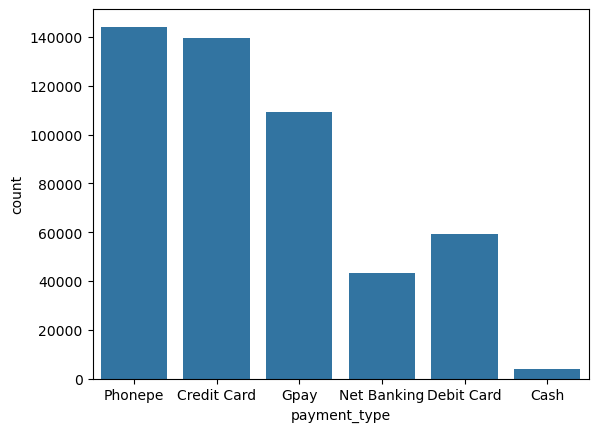

In [107]:
sns.countplot(x=df_tran.payment_type)

<Axes: xlabel='payment_type', ylabel='percent'>

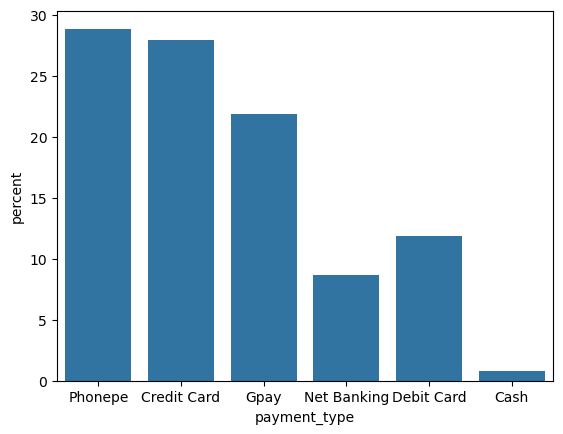

In [108]:
sns.countplot(x=df_tran.payment_type, stat='percent')

### Now finding which age-gruop using what kind of payment_method

In [117]:
df_customer = pd.read_csv('datasets/customers.csv')
df_credit = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv') 

bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']

# Now we are using the cut function of pandas to make the group
df_customer['age-group'] = pd.cut(df_customer['age'], bins = bin_edges, labels = bin_labels)

# First, merge df_trans and df_customer on 'cust_id'
df_merge1 = pd.merge(df_trans, df_customer, on="cust_id", how="inner")

# Then, merge the result with df_credit on 'cust_id'
df_merge = pd.merge(df_merge1, df_credit, on="cust_id", how="inner")

# Display the merged DataFrame
df_merge.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,name,gender,age,location,occupation,annual_income,marital_status,age-group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,Kriti Jain,Female,22,City,Fullstack Developer,47403.0,Married,18-25,533,0.289353,189.0,2.0,1000.0
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card,Pranav Singhal,Male,35,City,Data Scientist,137381.0,Single,26-48,666,0.789690,13470.0,4.0,20000.0
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe,Kunal Patel,Male,110,City,Freelancer,51629.0,Married,NaN,600,0.509649,551.0,0.0,1250.0
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay,Ishan Bali,Male,20,City,Fullstack Developer,51602.0,Married,18-25,606,0.676312,560.0,0.0,1500.0
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking,Advait Mistry,Male,22,City,Freelancer,43783.0,Married,18-25,394,0.785495,266.0,1.0,500.0


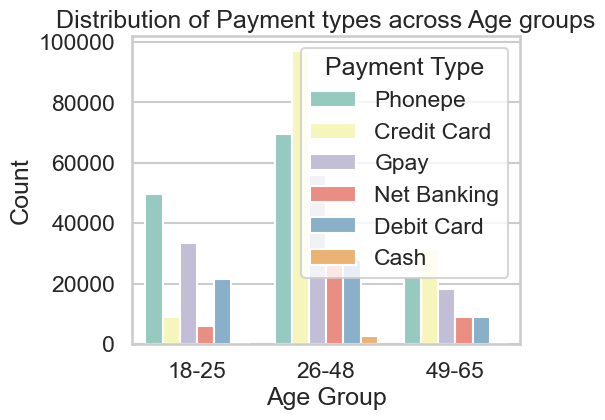

In [136]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age-group', hue='payment_type', data=df_merge, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

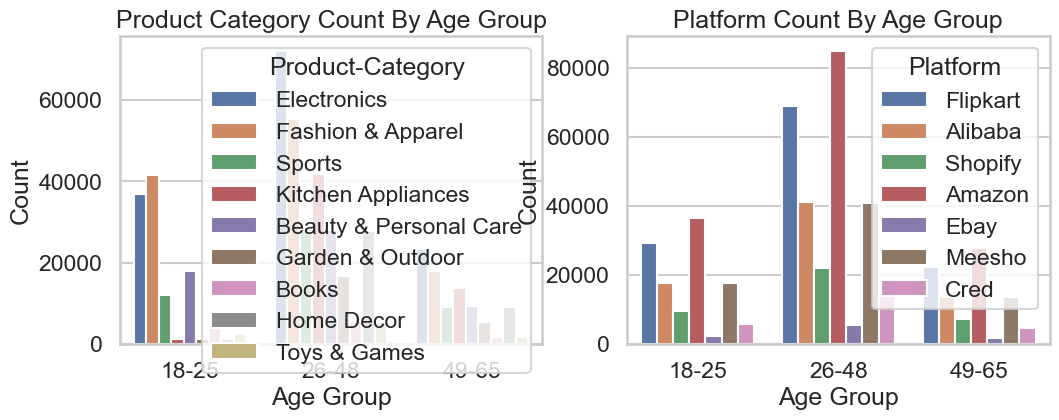

In [130]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,4))

sns.countplot(x='age-group', hue='product_category', data = df_merge, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")

ax1.legend(title = "Product-Category", loc= "upper right")


sns.countplot(x='age-group', hue='platform', data = df_merge, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")

ax2.legend(title = "Platform", loc= "upper right")

In [134]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merge.groupby('age-group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_5635/84721456.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df_merge.groupby('age-group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,age-group,annual_income,credit_limit,credit_score
0,18-25,34704.133379,881.879313,481.812365
1,26-48,146981.052961,19902.467934,597.776121
2,49-65,257924.197445,41535.716747,701.462842


/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_5635/2038737889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age-group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_5635/2038737889.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age-group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_5635/2038737889.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x

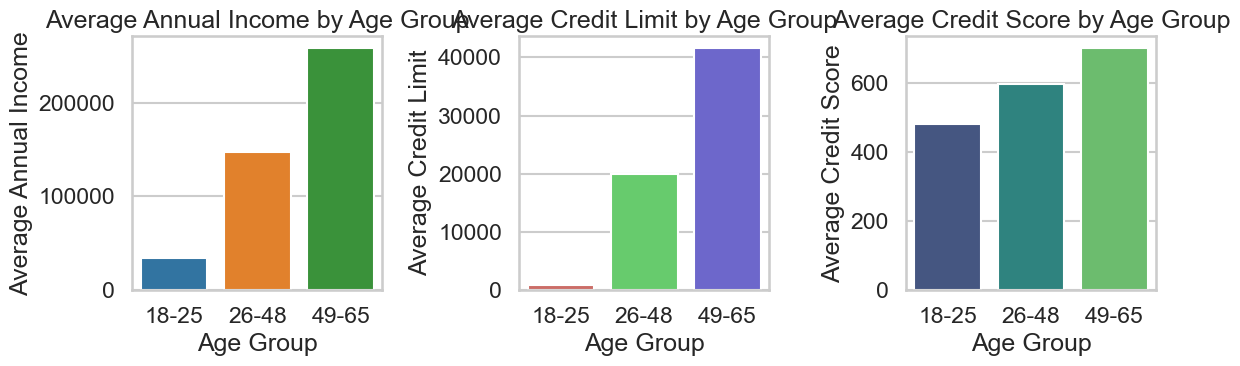

In [135]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age-group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age-group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age-group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()